Preparação das bibliotecas necessárias

In [ ]:
!pip install pandas
!pip install seaborn
!pip install psycopg2-binary
!pip install matplotlib

In [ ]:
import pandas as pd
import seaborn as sea
import psycopg2 as psy
import matplotlib.pyplot as plt

Conexão com o banco de dados

In [ ]:
conn = psy.connect(host= "kesavan.db.elephantsql.com", database= "ewhioity", user= "ewhioity", password= "X17lhDQUwBQkn2M6lup2sWuHfj6AQnOm")

Relatório 1: Seleção de livros filtrados por nota

In [ ]:
livro_nota = pd.read_sql_query("""select 
  titulo, 
  lpa.qtd_estrelas as nota
  from livro 
  join livro_pessoa_avalia as lpa on (lpa.fk_livro_codigo_livro = livro.codigo_livro) 
  order by qtd_estrelas desc""", conn)

livro_nota

,titulo,nota
0,The Witcher: A Espada do Destino,5
1,The Witcher: The Last Wish,5
2,The Witcher: O Sangue dos Elfos,5
3,A Rainha Vermelha,4
4,Gregor the overlander,4
5,Percy Jackson e o Ladrão de Raios,3
6,God of War,1


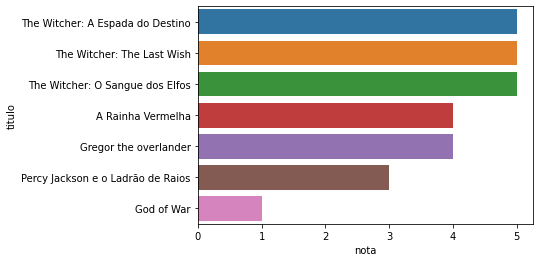

In [ ]:
livro_nota_graph = sea.barplot(y="titulo", x="nota", data=livro_nota)

Relatório 2: Seleção de livros filtrados por categoria

In [ ]:
livro_categoria = pd.read_sql_query("""select cat.dsc_categoria as categoria, count(*) as quantidade
from livro
join livro_categoria as lc on (lc.fk_livro_codigo_livro = livro.codigo_livro)
join categoria as cat on (lc.fk_categoria_codigo_categoria = cat.codigo_categoria)
group by cat.codigo_categoria""", conn)

livro_categoria

,categoria,quantidade
0,suspense,3
1,terror,1
2,literatura estrangeira,2
3,romance,1
4,fantasia,1


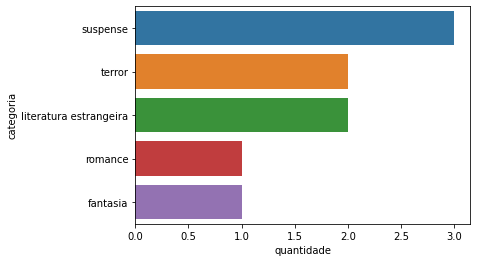

In [ ]:
livro_categoria_graph = sea.barplot(x="quantidade", y="categoria", data=livro_categoria)

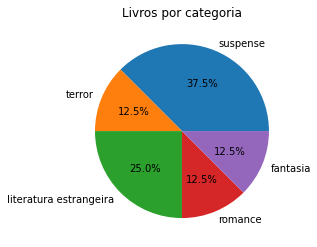

In [ ]:
plt.pie(livro_categoria["quantidade"], labels=livro_categoria["categoria"], autopct='%.1f%%')
plt.title("Livros por categoria")
plt.show()

Relatório 3: Seleção de livros filtrados por editora

In [ ]:
livro_editora = pd.read_sql_query("""select edit.nome as editora, count(*) as quantidade
from livro
join editora as edit on (edit.codigo_edit = livro.fk_editora_codigo_edit)
group by edit.codigo_edit""", conn)

livro_editora

,editora,quantidade
0,Intrínseca,1
1,Seguinte,1
2,LeYa,1
3,milfontes,5


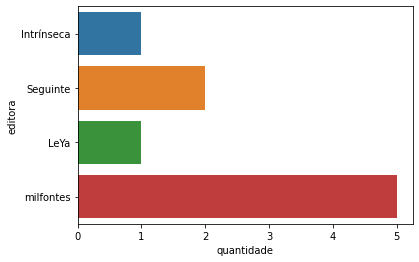

In [ ]:
livro_editora_graph = sea.barplot(x="quantidade", y="editora", data=livro_editora)

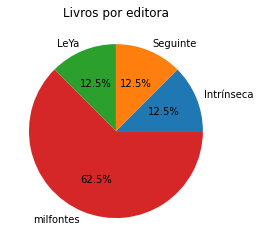

In [ ]:
plt.pie(livro_editora["quantidade"], labels=livro_editora["editora"], autopct='%.1f%%')
plt.title("Livros por editora")
plt.show()

Relatório 4: Livros mais locados

In [ ]:
livros_mais_locados = pd.read_sql_query("""select titulo as livro, count(lpl.fk_livro_codigo_livro) as quantidade
from livro
join livro_pessoa_loca as lpl on (lpl.fk_livro_codigo_livro = livro.codigo_livro)
group by lpl.fk_livro_codigo_livro, titulo""", conn)

livro_mais_locado

,livro,quantidade
0,The Witcher: A Espada do Destino,1
1,God of War,4
2,A Rainha Vermelha,1
3,Gregor the overlander,3
4,Percy Jackson e o Ladrão de Raios,3
5,The Witcher: The Last Wish,1
6,The Witcher: O Sangue dos Elfos,1


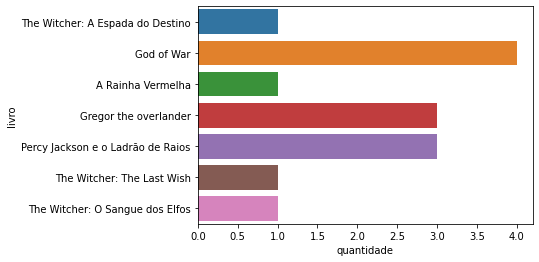

In [ ]:
livros_mais_locados_graph = sea.barplot(x="quantidade", y="livro", data=livros_mais_locados)

Relatório 5: Histórico de livros por pessoa

In [ ]:
livro_locados_pessoa = pd.read_sql_query("""select  p.nome as pessoa, count(fk_livro_codigo_livro) as quantidade
from livro_pessoa_loca as lpl
join pessoa as p on (lpl.fk_pessoa_codigo_pessoa = p.codigo_pessoa)
group by lpl.fk_pessoa_codigo_pessoa, p.nome""", conn)

livro_locados_pessoa

,pessoa,quantidade
0,Tristan Light,4
1,Geralt of Rivia,3
2,Yennefer of Vengerberg,3
3,Malu,4


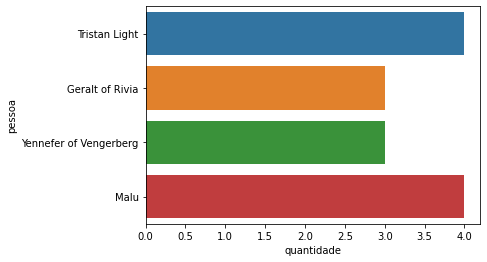

In [ ]:
livro_locados_pessoa_graph = sea.barplot(x="quantidade", y="pessoa", data=livro_locados_pessoa)